# Inferencia Estadística.




## 1. Introducción.

En DS, recolectamos y evaluamos datos para obtener conclusiones, aplicando para ello diversas técnicas de analisis. Algunas de estas conclusiones o descubrimientos pueden describirse fácilmente usando tablas y gráficos, lo que conocemos como **estadística descriptiva**. En muchos otros casos, necesitamos explorar una cantidad o variable *no observada* a partir de los datos disponibles, y estimar ciertos parámetros de una población a partir de una muestra representativa. En este caso, recurrimos a la **inferencia estadística**.



El proceso de inferencia estadística concierne al desarrollo de procesos, métodos y teoremas que nos permiten extraer significado e información de data generada por procesos estocásticos (aleatorios).



Tenemos una muestra de una población, y podemos calcular estadísticas descriptivas para ellas. ¿Pero son representativas de la población completa?
No podemos predecir valores absolutos para otras muestras o mediciones, pero podemos hablar en el lenguaje de probabilidades.

El objetivo de la inferencia estadística, es obtener conclusiones probabilísticas sobre los resultados que esperamos si volvemos  tomar los mismos datos.





## 2. Caso de Estudio: Análisis de Votaciones Presidenciales en EEUU 2020.


### 2.1 Descripción del Dataset.

Los datos para este problema correspoden a los resultados de las elecciones presidenciales 2020 de EEUU (Biden vs. Trump), a nivel de condados. Además, se incluyen algunas variables sociodemográficos y resultados de elecciones anteriores.

Estos datos pueden ser visualizados en el siguiente mapa de USA Today:

https://www.usatoday.com/in-depth/graphics/2020/11/10/election-maps-2020-america-county-results-more-voters/6226197002/


### 2.2 Objetivo.

Analizar el comportamiento de distintos estados y condados en las elecciones presidenciales estadounidenses 2020. Por ejemplo, algunas preguntas que podríamos responder a partir de los datos son:

- ¿Cómo se distribuyen los condados donde ganó la opción demócrata (Biden) o republicana (Trump)?
- ¿En qué se parecen/diferencian?
- ¿Hay correlaciones entre el porcentaje de voto demócrata (o republicano) y otras variables políticas o sociodemográficas?
- ¿Es el comportamiento de un condado o estado, predictor de otro?
- ¿Hay similitudes entre los swing states?

## 3. Desarrollo.



In [2]:
import matplotlib.pyplot as plt 
import numpy as np
import pandas as pd

### 3.1 Lectura de Datos.

La librería Pandas implemente métodos de lectura de distintos tipos de datos, entre ellos datos en formato `csv`, mediante la función `read_csv`:

https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html


In [3]:
#path='/Users/s/'
#dat=pd.read_csv('%s/county_election_results.csv'%path)
dat=pd.read_csv('county_election_results.csv')

Esta función almacena los datos en una estructura tipo DataFrame, que podemos explorar usando los métodos y atributos descritos en:

https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.html



In [4]:
dat.columns

Index(['Unnamed: 0', 'FIPS', 'eevp', 'electTotal', 'electionDate', 'level',
       'office', 'state', 'winner', 'votes_R_2020', 'votes_D_2020',
       'votes_third_party_2020', 'votes_total_2020', 'export_time',
       'acs_pct_pop_nonwhite', 'acs_pct_management', 'acs_pct_service',
       'pct_pop25+_bachelor_higher', 'median_household_income',
       'per_capita_income', 'category_education', 'category_income',
       'category_nonwhite', 'category_jobs_management',
       'category_jobs_service', 'pew_classification', 'region',
       'category_unemployment', 'date', 'POPESTIMATE2019', 'deaths',
       'deaths_per_thousand', 'deaths_percap_pctile', 'cases',
       'cases_per_thousand', 'cases_percap_pctile', 'case_pct_change',
       'BLS_Area_Code', 'Month', 'Month_Str', 'Labor Force', 'Employment',
       'Unemployment', 'Unemployment Rate', 'county', 'pct_2000_dem',
       'pct_2000_gre', 'pct_2000_rep', 'pct_2004_dem', 'pct_2004_rep',
       'pct_2008_dem', 'pct_2008_rep', 'pct_

In [ ]:
#dat.info

In [5]:
dat.describe

<bound method NDFrame.describe of       Unnamed: 0   FIPS  eevp  electTotal electionDate     level  \
0              0   1061   100           0   2020-11-03  FIPSCode   
1              1   1021   100           0   2020-11-03  FIPSCode   
2              2   1049   100           0   2020-11-03  FIPSCode   
3              3   1093   100           0   2020-11-03  FIPSCode   
4              4   1059   100           0   2020-11-03  FIPSCode   
...          ...    ...   ...         ...          ...       ...   
3107        3107  56041   100           0   2020-11-03  FIPSCode   
3108        3108  56003   100           0   2020-11-03  FIPSCode   
3109        3109  56023   100           0   2020-11-03  FIPSCode   
3110        3110  56031   100           0   2020-11-03  FIPSCode   
3111        3111  56045   100           0   2020-11-03  FIPSCode   

            office state winner  votes_R_2020  ...  votes_2000  votes_2004  \
0     presidential    AL      R         10848  ...        9559       10

### 3.2 Análisis Exploratorio.


Analicemos en primer lugar la distribución de condados donde se impuso Biden. Para ello, creamos una nueva columna con el porcentaje de votos demócratas por condado. 

#### 3.2.1 Análisis Gráfico.

Una primera forma de explorar esta información, es mediante un análisis exploratorio gráfico.

`Funciones de interés:`

https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.hist.html
https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.boxplot.html




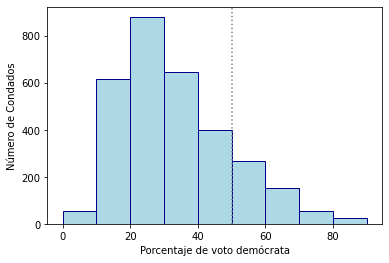

In [6]:
dat['pct_D']=dat['votes_D_2020']/dat['votes_total_2020']*100

#histograma
fig=plt.figure()
ax=fig.add_subplot(111)

bins=np.arange(0,100,10)
n,bins,patches=ax.hist(dat['pct_D'],bins=bins,histtype='bar',ec='darkblue',fc='lightblue')
ax.set_xlabel('Porcentaje de voto demócrata')
ax.set_ylabel('Número de Condados')
ax.axvline(x=50,ls=':',color='gray')

De acuerdo al gráfico, la primera conclusión es que más condados de EEUU votaron por Trump, que por el actual presidente Biden.¿Cómo se explica entonces la victoria demócrata?

In [7]:
counties_D=dat[dat['pct_D']>=50.0]
counties_R=dat[dat['pct_D']<50.0]
print(len(counties_R),len(counties_D),len(dat))

2599 513 3112


**Binning bias.**

Lo histogramas son informativos y permiten entender las características genelares de nuestros datos, pero la gran desventaja, es que los mismos datos pueden interpretarse de distinta forma dependiendo de la elección de bins. La elección del número de bins es arbitraria, lo cual puede generar sesgos (binning bias). Adicionalmente, en un histograma no estamos graficando todos los datos, sino que los agrupamos en bins, y por lo tanto perdemos sus valores. Una regla común es usar un número de bins igual a la raíz cuadrada del número de muestras.

55


55

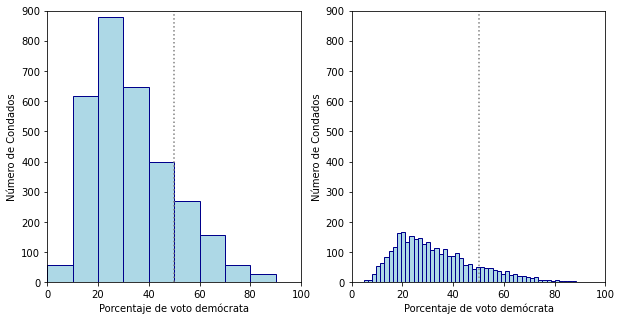

In [9]:

fig=plt.figure(figsize=(10,5))
ax1=fig.add_subplot(121)
ax2=fig.add_subplot(122)

bins=np.arange(0,100,10)
nbins=int(np.sqrt(len(dat)))
print(nbins)
_=ax1.hist(dat['pct_D'],bins=bins,histtype='bar',ec='darkblue',fc='lightblue')
_=ax2.hist(dat['pct_D'],bins=nbins,histtype='bar',ec='darkblue',fc='lightblue')

for ax in [ax1,ax2]:
    ax.set_xlabel('Porcentaje de voto demócrata')
    ax.set_ylabel('Número de Condados')
    ax.axvline(x=50,ls=':',color='gray')
    ax.set_ylim(0,900)
    ax.set_xlim(0,100)


Para evitar sesgos de bias y pérdidas de infomración al agrupar los datos, una buena alternativa de exploración gráfica es la **función de distribución acumulada empírica (FDAe)**, donde:
- `Eje x:`la cantidad medida
- `Eje y:` fracción de datos que tienen un valor menor al correspondiente valor `x`.

Para construirla, ordenamos los datos `x`, y construimos un vector `y` de la siguiente forma:

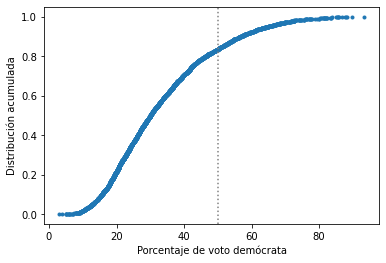

In [10]:
n=len(dat)
x=np.sort(dat['pct_D'])
y=np.arange(1,len(x)+1)/len(x)

plt.plot(x,y,marker='.',ls='none')
plt.xlabel('Porcentaje de voto demócrata')
plt.ylabel('Distribución acumulada')
plt.axvline(x=50,ls=':',color='gray')

Podemos decir por ejemplo, que aproximadamente el 80% de los condados fue ganado por el candidato republicano, ya que tienen un porcentaje de voto demócrata menor al 50%.

La FDAe también es útil para comparar distribuciones. Por ejemplo, podemos comparar las distribuciones en los estados que definieron la elección del 2020: Arizona, Pensylvannia, Michigan, Georgia y Wisconsin.

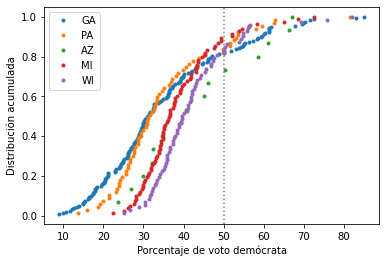

In [11]:
def fdae(data):
    n=len(data)
    x=np.sort(data)
    y=np.arange(1,len(x)+1)/len(x)
    return(x,y)

swing=['GA','PA','AZ','MI','WI',]

for state in swing:
    dats=dat[dat['state']==state]
    x,y=fdae(dats['pct_D'])
    plt.plot(x,y,marker='.',ls='none',label=state)
    plt.legend()
plt.xlabel('Porcentaje de voto demócrata')
plt.ylabel('Distribución acumulada')
plt.axvline(x=50,ls=':',color='gray')

¿Qué estados tienen mayores y menores fracciones de condados ganados por Biden?

#### 3.2.2 Estadísticas de Resumen.

Los histogramas y FDAe entregan un resumen efectivo de los datos, pero puede ser de utilidad resumirlos aún más en algunas estadísticas numéricas, como por ejemplo: 

- **Media** (`np.mean()`): es la suma de todos los valores, dividida por el número de puntos.
 
$$\mu=\frac{1}{n} \sum_{i=1}^n x_i $$

- **Mediana** (`np.median()`): es el valor medio de un conjunto de datos. Es inmune a valores extremos o outliers. Para calcularla, se ordenan los datos y se elige el valor que queda en la mitad. 
 
- **Percentiles** (`np.percentile()`): el percentil $p$, corresponde al valor que es mayor al $p\%$ de los datos.


- **Varianza** (`np.var()`): promedio de la distancia cuadrática de los datos a la media. Es una medida de la dispersión de los datos.

$$\rm{Var}=\frac{1}{n} \sum_{i=1}^n (x_i-\bar{x})^2$$

- **Desviación estándar** (`np.std()`): es la raíz cuadrada de la varianza. Está en la misma escala de unidades que los datos.

$$\sigma=\sqrt{\frac{1}{n} \sum_{i=1}^n (x_i-\bar{x})^2}$$

- **Covarianza** (`np.cov()`): es una medida de cómo dos cantidades varían juntas.
Es la media del producto entre las diferencias de los valores respecto a la media.

$$\rm{Cov} (x,y)=\frac{1}{n} \sum_{i=1}^n (x_i-\bar{x})(y_i-\bar{y})$$

- **Coeficiente de correlación de Pearson** (`np.corrcoef`): para tener una medida más general y aplicable de la correlación entre dos variables, necesitamos que sea adimensional. Por lo tanto dividimos la covarianza por las desviaciones estándar de $x$ e $y$. Esto define el coeficiente de correlación de Pearson ($\rho$).

$$\rho=\frac{\rm{Cov} (x,y)}{\sigma_x \sigma_y}$$


In [ ]:
dat.columns

Covarianza: 1529.2228630936759
Pearson: 0.7003677095910197


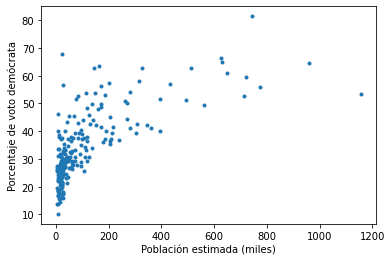

In [12]:
#Análisis de covarianza: % votos demócratas y cantidad total de votantes en swing states
swing=['PA','OH','FL']

dat_swing=dat[dat['state'].isin(swing)]

x=dat_swing['votes_total_2020']/1000
y=dat_swing['pct_D']

cov=np.cov(x,y)
print('Covarianza:',cov[0,1])

pearson=np.corrcoef(x,y)
print('Pearson:',pearson[0,1])

#scatter plot:
_=plt.plot(x,y,'.')
_=plt.xlabel('Población estimada (miles)')
_=plt.ylabel('Porcentaje de voto demócrata')

### 3.3 Estimación de Parámetros.

Supongamos un caso muy simple, en que podemos modelar la relación entre dos variables mediante una regresión lineal de la forma:

$$ y=ax+b $$

donde $a$ y $b$ son parámetros a estimar.

Por ejemplo, podemos modelar la relación entre el porcentaje de voto demócrata, y la cantidad total de votos por condado

Slope:0.051, Intercept:28.189


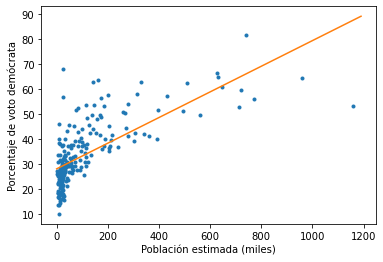

In [13]:
a,b=np.polyfit(x,y,1)
xf=np.arange(0,1200,10)
yf=a*xf+b

_=plt.plot(x,y,'.')
_=plt.plot(xf,yf,'-')

_=plt.xlabel('Población estimada (miles)')
_=plt.ylabel('Porcentaje de voto demócrata')

print('Slope:%.3f, Intercept:%.3f'%(a,b))

### 3.4 Boostrapping.
 
Veamos primero cómo generar remuestreos y réplicas de bootstrapping usando `numpy.random`. Para ello, consideremos los datos de fracción de voto demócrata para todos los condados de EEUU, y su distribución acumulada.

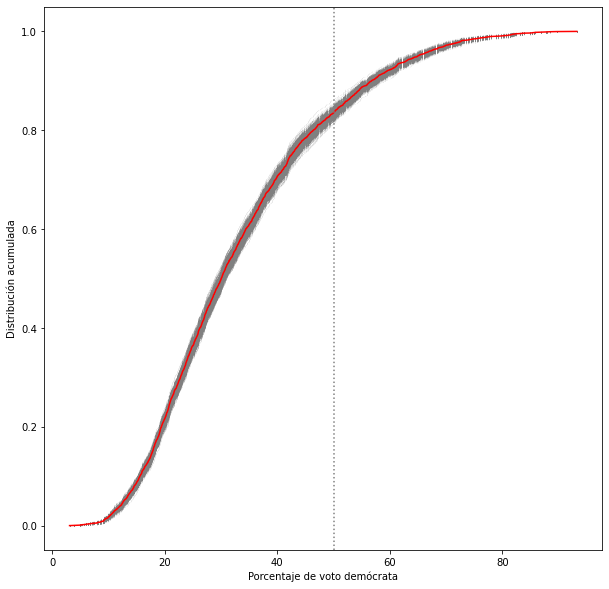

In [14]:
def fdae(data):
    n=len(data)
    x=np.sort(data)
    y=np.arange(1,len(x)+1)/len(x)
    return(x,y)

nsamples=1000
xb=dat['pct_D']
plt.figure(figsize=(10,10))

for ns in range(nsamples):
    bs_sample=np.random.choice(xb,size=len(xb))
    x, y = fdae(bs_sample)
    _ = plt.plot(x, y, marker='.', markersize=0.2,linestyle='none',color='gray', alpha=0.1)
    

x, y = fdae(xb)
_ = plt.plot(x, y, '-', color='red')
 
    
plt.xlabel('Porcentaje de voto demócrata')
plt.ylabel('Distribución acumulada')
plt.axvline(x=50,ls=':',color='gray')


### Bootstrap no paramétrico.

Suponga ahora que por alguna inesperada razón, el candidato perdedor logra anular al elección, y ésta tiene que repetirse (bajo las mismas condiciones iniviales). ¿Qué podemos decir del resultado esperado para esta nueva "medición", a partir de los 

IC (95%): [0.15134158 0.17737789]


(0.0, 110.0)

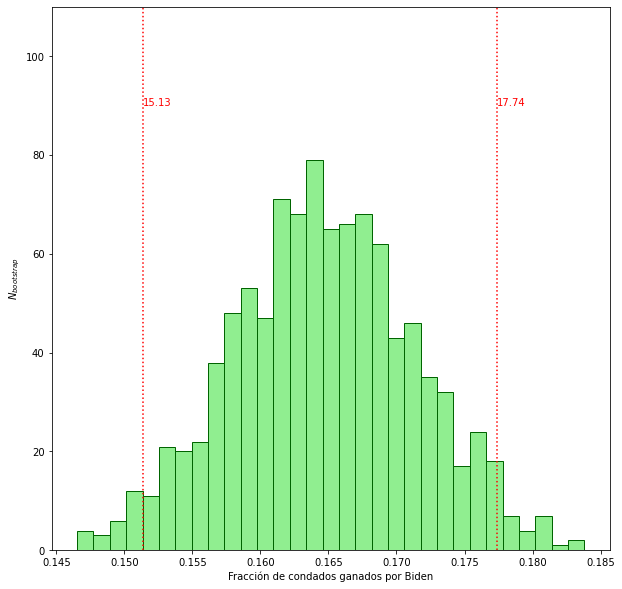

In [15]:
#qué fracción de los condados serían ganados por demócratas si repetimos la elección bajo las mismas condiciones?

nsamples=1000
xb=dat['pct_D']

#estadistica promedio para los datos
counties_D=xb[xb>=50.0]
frac_D=len(counties_D)/len(dat)

plt.figure(figsize=(10,10))

frac_D_b=np.empty(nsamples)
for ns in range(nsamples):
    bs_sample=np.random.choice(xb,size=len(xb))
    counties_D_b=bs_sample[bs_sample>=50.0]
    frac_D_b[ns]=len(counties_D_b)/len(bs_sample)


_ = plt.hist(frac_D_b,bins=int(np.sqrt(nsamples)),ec='darkgreen',fc='lightgreen')
 
    
IC=np.percentile(frac_D_b, [2.5, 97.5])
                 
print('IC (95%):',IC)     

plt.xlabel('Fracción de condados ganados por Biden')
plt.ylabel(r'$N_{bootstrap}$')
#plt.axvline(x=frac_D,ls='--',color='k')
plt.axvline(x=IC[0],ls=':',color='r')
plt.axvline(x=IC[1],ls=':',color='r')
plt.text(IC[0],90,'%.2f'%(IC[0]*100),color='r',fontsize=10)
plt.text(IC[1],90,'%.2f'%(IC[1]*100),color='r',fontsize=10)

#plt.fill_betweenx([0,110],0.14,IC[0],alpha=0.2,color='r')
#plt.fill_betweenx([0,110],IC[1],0.2,alpha=0.2,color='r')
plt.ylim(0,110)


A partir de los resultados de la votación del 3/11/2020, podemos *inferir* que si la elección se repitiera (en las mismas condiciones), Biden ganaría entre un 15.1% y 17.7% de los condados, con 95% de confiabilidad.


### 3.5 Boostrapping de a Pares e Intervalos de Confiabilidad.

¿Qué pasaría si repetimos la elección, bajo las mismas condiciones? ¿Cómo cambiarían los parámetros de la función lineal estimada en el punto 3.3 (% de voto demócrata vs. total de votos en FL, OH y PA)? 

Usando bootstrapping, podemos obtener intervalos de confiabilidad para $a, b$: generamos colecciones de pares de datos, y obtenemos la distribución de los parámetros obtenidos.

a: IC (95%): [0.04068127 0.06598013]
b: IC (95%): [26.58220112 29.73856391]


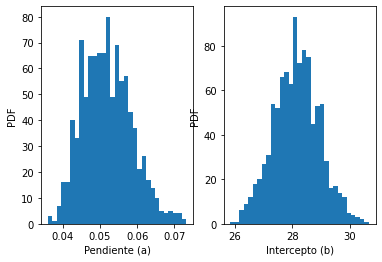

In [16]:
x=dat_swing['votes_total_2020']/1000
y=dat_swing['pct_D']
x=x.to_numpy()
y=y.to_numpy()
#Indices
inds=np.arange(len(x))

#numero de muestras
size=1000 

# Initializar replicas: bs_slope_reps, bs_intercept_reps
bs_slope_reps = np.empty(size)
bs_intercept_reps = np.empty(size)

# Generar replicates
for i in range(size):
    bs_inds = np.random.choice(inds, size=len(inds))
    bs_x, bs_y = x[bs_inds], y[bs_inds]
    bs_slope_reps[i], bs_intercept_reps[i] = np.polyfit(bs_x, bs_y, 1)

print('a: IC (95%):',np.percentile(bs_slope_reps, [2.5, 97.5]))     
print('b: IC (95%):',np.percentile(bs_intercept_reps, [2.5, 97.5]))     
  
# Plot the histogram

f, (ax1, ax2) = plt.subplots(1, 2)

nbins=int(np.sqrt(size))
ax1.hist(bs_slope_reps, bins=nbins)
ax1.set_xlabel('Pendiente (a)')
ax1.set_ylabel('PDF')

ax2.hist(bs_intercept_reps, bins=nbins)
ax2.set_xlabel('Intercepto (b)')
ax2.set_ylabel('PDF')

plt.show()


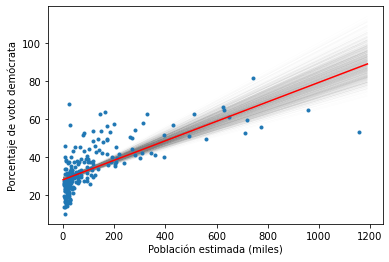

In [17]:
xf=np.arange(0,1200,10)
for a,b in zip(bs_slope_reps,bs_intercept_reps):
    plt.plot(xf,a*xf+b,lw=0.1,alpha=0.1,color='gray')
    
_=plt.plot(x,y,'.')
_=plt.plot(xf,yf,'-',color='red')

_=plt.xlabel('Población estimada (miles)')
_=plt.ylabel('Porcentaje de voto demócrata')

### 3.6 Testeo de Hipótesis.

En el análisis anterior, asumimos un modelo lineal para la generación de datos, y estimamos los parámetros del modelo junto con sus intervalos de confiabilidad. Pero, ¿cómo evaluamos si el modelo es una descripción razonable de los datos?.

Por ejemplo, supongamos la siguiente hipótesis: **dos estados vecinos como Michigan y Wisconsin, tienen la misma distribución de probabilidad de votos a nivel de condado.**
 
Esta es nuestra **hipótesis nula**, y tenemos datos para testearla. En concreto, necesitamos evaluar qué tan razonables son los datos observados, asumiendo que la hipótesis es verdadera.

Podemos comenzar, por comparar la distribución acumulada y estadísticas de resumen para cada estado.

MI, mean:38.78, median:36.57, std:9.62, len:83
WI, mean:42.03, median:39.97, std:10.31, len:72


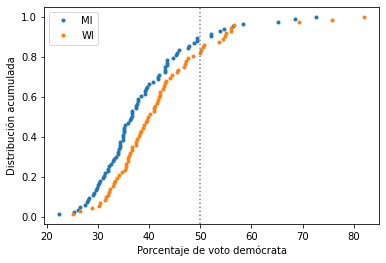

In [19]:
def fdae(data):
    n=len(data)
    x=np.sort(data)
    y=np.arange(1,len(x)+1)/len(x)
    return(x,y)

test=['MI','WI']

for state in test:
    dats=dat[dat['state']==state]
    x,y=fdae(dats['pct_D'])
    plt.plot(x,y,marker='.',ls='none',label=state)
    plt.legend()
    print('%s, mean:%.2f, median:%.2f, std:%.2f, len:%.d'%(state,dats['pct_D'].mean(),dats['pct_D'].median(),dats['pct_D'].std(),len(dats['pct_D'])))
plt.xlabel('Porcentaje de voto demócrata')
plt.ylabel('Distribución acumulada')
plt.axvline(x=50,ls=':',color='gray')

In [20]:
diff_mean=42.03-38.78
diff_median=39.97-36.46
diff_std=10.31-9.62
print(diff_mean,diff_median,diff_std)

3.25 3.509999999999998 0.6900000000000013


¿Es suficiente este análisis para llegar a una conclusión?

Para testear la hipóetsis, podemos simular cómo serían los datos observados si las tendencias de voto en ambos estados estuvieran idénticamente distribuidas.

Para ello, reordenamos los datos de manera que los datos de MI y WI son indistinguibles entre sí. Es decir, como si provinieran de una única población, donde el estado no importa. Esto se denomina `permutaciones`, y está implementado en la siguiente función:

https://numpy.org/doc/stable/reference/random/generated/numpy.random.permutation.html

Luego, etiquetamos los primeros datos como 'MI', y los siguientes como 'WI', y calculamos su distribución.

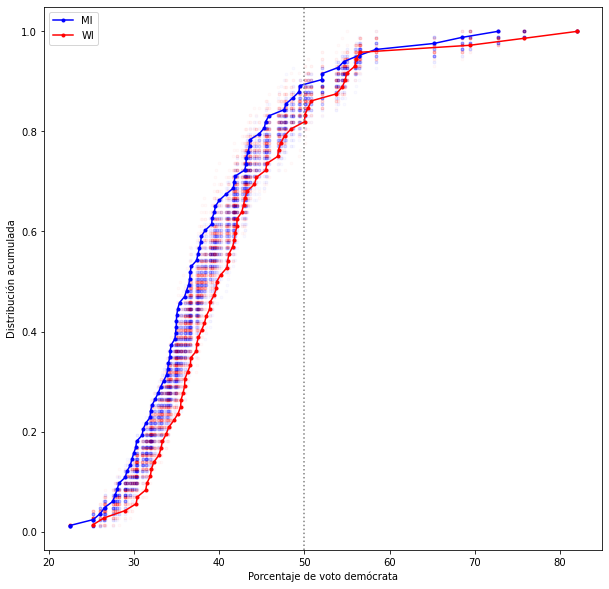

In [21]:
def permutation_sample(data1, data2):
    """Generar una permutacion de dos datasets"""

    #datos concatenados
    data = np.concatenate((data1, data2))

    # permutacion
    permuted_data = np.random.permutation(data)

    #muestras permutadas
    perm_sample_1 = permuted_data[:len(data1)]
    perm_sample_2 = permuted_data[len(data1):]

    return perm_sample_1, perm_sample_2


#datos por estado
pct_D_MI=dat[dat['state']=='MI']['pct_D']
pct_D_WI=dat[dat['state']=='WI']['pct_D']

#generamos n permutaciones
nperm=100
plt.figure(figsize=(10,10))
for n in range(nperm):
    perm1,perm2=permutation_sample(pct_D_MI,pct_D_WI)
    x,y=fdae(perm1)
    plt.plot(x,y,marker='.',ls='none',color='blue',alpha=0.02)
    
    x,y=fdae(perm2)
    plt.plot(x,y,marker='.',ls='none',color='red',alpha=0.02)

#graficamos las distribuciones originales de cada estado
x,y=fdae(pct_D_MI)
plt.plot(x,y,marker='.',ls='-',label='MI',color='blue')

x,y=fdae(pct_D_WI)
plt.plot(x,y,marker='.',ls='-',label='WI',color='red')
plt.legend()

plt.xlabel('Porcentaje de voto demócrata')
plt.ylabel('Distribución acumulada')
plt.axvline(x=50,ls=':',color='gray')


Ahora que sabemos cómo simular la hipótesis nula usando permutaciones, podemos testearla. Ello implica evaluar si los datos observados son consistentes asumiendo que la hipótesis es verdadera. ¿Cómo hacemos esto cuantitativamente?

Para evaluar la hipótesis, necesitamos una **estadística de prueba**. Es decir, una cantidad que podemos calcular a partir de las observaciones, y de los datos simulados bajo la hipótesis nula. Esta estadística tiene que ser pertinente a la hipótesis que estamos testeando.

En este caso, la hipotésis nula es: 
> $H_0$: los dos estados (WI y MI) tienen la misma distribución de voto demócrata. 

Es decir, su media debería ser idéntica, o *la diferencia entre sus medias* debería ser 0. Por lo tanto, elegimos como estadística de prueba esta diferencia.

Luego, para evaluar si la estadística de prueba (en este caso, la diferencia entre medias) observada es consistente con la hipótesis nula, analizamos la distribución de réplicas y calculamos el **valor-p**.

> El valor p se define como la probabilidad de que un valor estadístico calculado sea posible dada una hipótesis nula cierta. En términos simples, el valor p ayuda a diferenciar resultados que son producto del azar del muestreo, de resultados que son estadísticamente significativos.

Si el valor p cumple con la condición de ser menor que un nivel de significancia impuesto arbitrariamente, este se considera como un resultado estadísticamente significativo y, por lo tanto, permite *rechazar la hipótesis nula*. Típicamente, se rechaza la hipótesis nula cuando $p<0.05$.


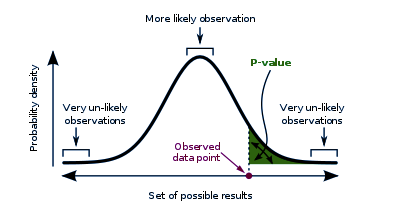



Observed mean difference:-3.26
valor-p = 0.0242


Text(0, 0.5, 'N')

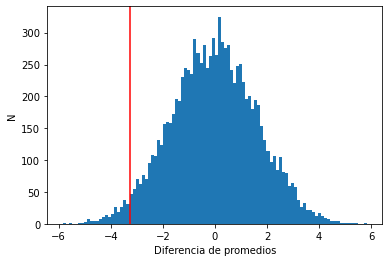

In [22]:
def perm_reps(data_1, data_2, size=1):
    """Generate multiples replicas de la diferencia media para las permutaciones."""

    # Initializar arreglo dereplicas
    perm_replicates = np.empty(size)

    for i in range(size):
        # Generar permutacion
        perm_sample_1, perm_sample_2 = permutation_sample(data_1, data_2)

        # Compute the test statistic
        perm_replicates[i] = perm_sample_1.mean()-perm_sample_2.mean()

    return perm_replicates

#observaciones (MI-WI)
obs_diff=pct_D_MI.mean()-pct_D_WI.mean()

print(r'Observed mean difference:%.2f'%obs_diff)

#permutaciones
nperm=10000
perm_replicates =perm_reps(pct_D_MI,pct_D_WI, size=nperm)

#valor-p
pval=np.sum(perm_replicates<=obs_diff)/len(perm_replicates)
print('valor-p =', pval)

_=plt.hist(perm_replicates,bins=100)
_=plt.axvline(x=obs_diff,color='r',label='Observed difference')
plt.xlabel('Diferencia de promedios')
plt.ylabel('N')

El valor p obtenido indica que hay sólo un 2.2% de probabilidad de obtener las diferencia media observada (3.26%) bajo la hipótesis nula de que las distribuciones de voto demócrata en MI y WI son equivalentes. Es decir, **se rechaza la hipótesis nula**: MI y WI *no* tienen una diferencia de media significativamente igual a 0, por lo tanto sus distribuciones no son similares.